In [120]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical



In [121]:
# Gantilah 'nama_file.csv' dengan nama file CSV yang sebenarnya
# Membaca data dari file CSV menggunakan Pandas
csv_file_path = 'labels_eggs-checker.csv'
data = pd.read_csv('labels_eggs-checker.csv')




In [115]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [116]:
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [117]:
print(df.head())
print(df.columns)


   ClassB-HLC  20  154  554  692  \
0  ClassB-HLC  79  176  473  590   
1  ClassB-HLC  45  271  441  547   
2  ClassB-HLC  41  357  498  559   
3  ClassB-HLC  38  237  488  579   
4  ClassB-HLC  32  192  479  608   

       WhatsApp Image 2021-11-18 at 11.19.00 PM.jpeg  588  1280  
0      WhatsApp Image 2021-11-18 at 11.19.02 PM.jpeg  588  1280  
1      WhatsApp Image 2021-11-18 at 11.19.03 PM.jpeg  588  1280  
2  WhatsApp Image 2021-11-18 at 11.19.04 PM (1).jpeg  588  1280  
3      WhatsApp Image 2021-11-18 at 11.19.04 PM.jpeg  588  1280  
4      WhatsApp Image 2021-11-18 at 11.19.05 PM.jpeg  588  1280  
Index(['ClassB-HLC', '20', '154', '554', '692',
       'WhatsApp Image 2021-11-18 at 11.19.00 PM.jpeg', '588', '1280'],
      dtype='object')


In [118]:
#memproses data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [119]:
# Build model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [94]:
#compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# latih model dan evaluasi model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')



Epoch 1/5
938/938 [==============================] - 76s 75ms/step - loss: 0.1815 - accuracy: 0.9451 - val_loss: 0.0512 - val_accuracy: 0.9850
Epoch 2/5
938/938 [==============================] - 78s 83ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0414 - val_accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 87s 93ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0385 - val_accuracy: 0.9872
Epoch 4/5
938/938 [==============================] - 80s 86ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 0.0251 - accuracy: 0.9923
Test accuracy: 0.9922999739646912


In [95]:
# Membuat objek ImageDataGenerator
# Melatih model menggunakan generator
# Membuat generator untuk data pelatihan
# Membuat generator untuk data validasi
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow(train_images, train_labels, batch_size=64)
validation_generator = datagen.flow(test_images, test_labels, batch_size=64)
history = model.fit(train_generator, epochs=5, steps_per_epoch=len(train_images)//64, 
validation_data=validation_generator, validation_steps=len(test_images)//64)

Epoch 1/5
937/937 [==============================] - 75s 75ms/step - loss: 1.4395 - accuracy: 0.5029 - val_loss: 0.4420 - val_accuracy: 0.8614
Epoch 2/5
937/937 [==============================] - 78s 83ms/step - loss: 0.3263 - accuracy: 0.8979 - val_loss: 0.2104 - val_accuracy: 0.9359
Epoch 3/5
937/937 [==============================] - 64s 68ms/step - loss: 0.1959 - accuracy: 0.9391 - val_loss: 0.1619 - val_accuracy: 0.9507
Epoch 4/5
937/937 [==============================] - 60s 64ms/step - loss: 0.1362 - accuracy: 0.9584 - val_loss: 0.1152 - val_accuracy: 0.9614
Epoch 5/5
937/937 [==============================] - 77s 82ms/step - loss: 0.0976 - accuracy: 0.9699 - val_loss: 0.0703 - val_accuracy: 0.9763


In [96]:
# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

# Train the model with TensorBoard callback
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, 
validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
# Model Information
num_layers = len(model.layers)
total_hidden_nodes = sum(layer.output_shape[1] for layer in model.layers if len(layer.output_shape) > 1)
total_weights = sum(layer.count_params() for layer in model.layers)


Epoch 1/5
938/938 [==============================] - 105s 112ms/step - loss: 0.9584 - accuracy: 0.9684 - val_loss: 0.1469 - val_accuracy: 0.9693
Epoch 2/5
938/938 [==============================] - 61s 64ms/step - loss: 0.0989 - accuracy: 0.9794 - val_loss: 0.0961 - val_accuracy: 0.9814
Epoch 3/5
938/938 [==============================] - 70s 75ms/step - loss: 0.0622 - accuracy: 0.9857 - val_loss: 0.0876 - val_accuracy: 0.9807
Epoch 4/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0439 - accuracy: 0.9887 - val_loss: 0.0848 - val_accuracy: 0.9846
Epoch 5/5
938/938 [==============================] - 91s 97ms/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0711 - val_accuracy: 0.9870


In [97]:
# Print the information
print(f'Number of Hidden Layers: {num_layers}')
print(f'Total Hidden Nodes: {total_hidden_nodes}')
print(f'Total Weights (Parameters): {total_weights}')

Number of Hidden Layers: 8
Total Hidden Nodes: 708
Total Weights (Parameters): 93322


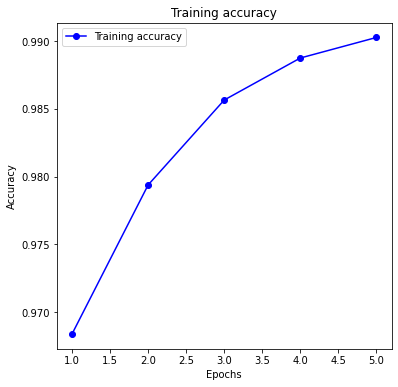

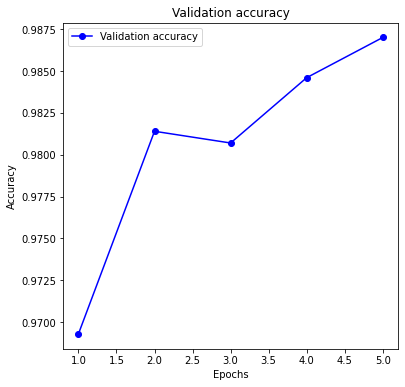

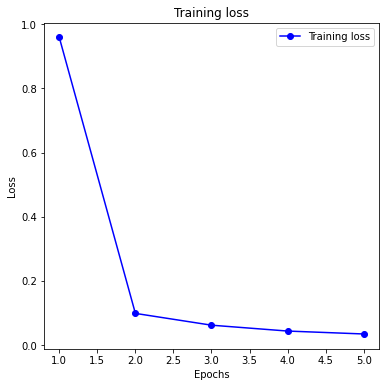

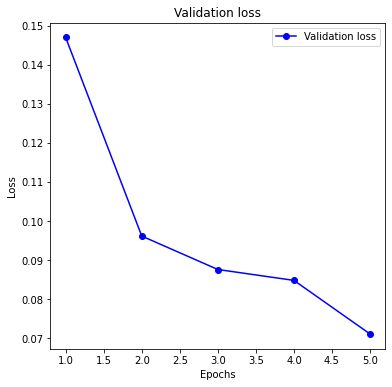

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
# Retrieve training history from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(6, 6))
plt.plot(epochs, val_acc, 'bo-', label='Validation accuracy')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation loss
plt.figure(figsize=(6, 6))
plt.plot(epochs, val_loss, 'bo-', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save model
model.save('mnist_model.h5')


In [14]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])


Epoch 1/5
1875/1875 [==============================] - 92s 47ms/step - loss: 0.0547 - accuracy: 0.9846 - val_loss: 0.0583 - val_accuracy: 0.9849
Epoch 2/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0565 - val_accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0560 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.0520 - val_accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.0538 - val_accuracy: 0.9863
